## Mahmoud Emara Term Project I
### Anazlyation of NBA Players Using Stats of 2014-2015

The NBA has changed over the decades and the game is not played the same as it used to. Players are now becoming more versatile in their skills and are developing new talent that has not been seen before. In today's NBA, the player positions are not what they used to be, more centers are starting to shoot more three-pointers at an efficient rate while point guards are soaring over 7-footers for rebounds. How can we determine what the true positions of these players are? In this study, I will explore the use of classification using PCA and $k$-NN to predict a players true position using their stats.

In [5]:
import csv
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open(r'players_stats_other.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')

# Here I chose the most important stats to look at when analyzing players as these stats vary over differen positions.
# For example, a center or power forward would get more rebounds than other players, a point guard would get more assists
# than other players as they are the ones who distribute the ball the most, and shooting guards would score the most points
# since they are relied on their ability to score. The data used is randomly sorted by position, since this data is 
# organized by alphabetical order, the positions will be randomized.
    count = -1
    number = []; playerNames = []; positions = []; points = []
    fgPCT = []; threePCT = []; fthPCT = []; totalReb = []; assist = []
    steals = []; blocks = []; turnOver = []; offReb = []; asstTO = []
    labels = []
    
    for row in readCSV:
        count+=1; number.append(count)
        playerNames.append(row[0]); positions.append(row[30]); 
        points.append(row[3]); fgPCT.append(row[6])
        threePCT.append(row[9]); fthPCT.append(row[12])
        totalReb.append(row[15]); assist.append(row[16])
        steals.append(row[17]); blocks.append(row[18])
        turnOver.append(row[19]); offReb.append(row[13])
        asstTO.append(row[22])
        # Make the position as labels
        if(row[30] == 'PG'):
            labels.append(1)
        if(row[30] == 'SG'):
            labels.append(2)
        if(row[30] == 'SF'):
            labels.append(3)
        if(row[30] == 'PF'):
            labels.append(4)
        if(row[30] == 'C'):
            labels.append(5)
            
numA = np.column_stack(number)
namesA = np.column_stack(playerNames)
posA = np.column_stack(positions)
pointsA = np.column_stack(points)
fgA = np.column_stack(fgPCT)
threeA = np.column_stack(threePCT)
freeTA = np.column_stack(fthPCT)
rebA = np.column_stack(totalReb)
assistA = np.column_stack(assist)
stealA = np.column_stack(steals)
blockA = np.column_stack(blocks)
turnA = np.column_stack(turnOver)
offRA = np.column_stack(offReb)
atoA = np.column_stack(asstTO)

# With Names and positions (statsN)
statsNames = np.array(list(zip(numA, namesA, posA, pointsA, fgA, threeA, freeTA, rebA, assistA, stealA, blockA, turnA)))
statsN = statsNames[0,:,:]

# Without Names and positions (stats)
statsNoNames = np.array(list(zip(fgA, atoA, threeA, freeTA, rebA, pointsA, assistA, stealA, blockA, turnA, offRA)))
stats = statsNoNames[0,:,:]
print("Original Data dimensions: ",stats.shape)
print("Transposed Data dimensions: ",stats.T.shape)
print("Dimensions without titles: ", stats.T[1:,:].shape)

data = stats.T[1:,:]
names = playerNames[1:]
pos = positions[1:]
#print(data[0])
dataSet = data.astype(np.float)
#print(dataSet[0])
# Make training/test data and label (Using 80% of data as training set)
trainDataSet = dataSet[0:441,:]
trainLabels = labels[0:441]

splitR = 0.9
testDataSet = dataSet[441:,:]
testLabels = labels[441:]
testNames = names[441:] 

# print(len(trainDataSet))
# print(len(trainLabels))
# print(len(testDataSet))
# print(len(testLabels))

Original Data dimensions:  (11, 491)
Transposed Data dimensions:  (491, 11)
Dimensions without titles:  (490, 11)


In [45]:
# PCA of centered data

trainDataSetT = trainDataSet.T
meanVector = trainDataSetT.mean(axis=1)
meanMat = np.tile(meanVector.reshape(11,1),(1,441))
centData = trainDataSetT - meanMat
print("Centered Data dimensions: ",centData.shape)

U, s, Vt = np.linalg.svd(centData)
kComp = 2
princ = U[:,0:kComp]
Xtilde = np.matmul(princ.T, centData)
print(Xtilde.T.shape)
# print(Xtilde.T)

Centered Data dimensions:  (11, 441)
(441, 2)


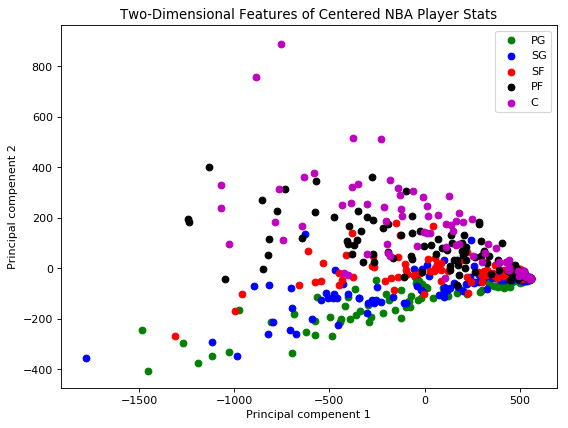

In [54]:
oneX = list(); oneY = list()
twoX = list(); twoY = list()
threeX = list(); threeY = list();
fourX = list(); fourY = list();
fiveX = list(); fiveY = list();


for i in range(len(trainDataSet)):
    if(labels[i] == 1):
        oneX.append(Xtilde.T[i][0])
        oneY.append(Xtilde.T[i][1])
    if(labels[i] == 2):
        twoX.append(Xtilde.T[i][0])
        twoY.append(Xtilde.T[i][1])
    if(labels[i] == 3):
        threeX.append(Xtilde.T[i][0])
        threeY.append(Xtilde.T[i][1])
    if(labels[i] == 4):
        fourX.append(Xtilde.T[i][0])
        fourY.append(Xtilde.T[i][1])
    if(labels[i] == 5):
        fiveX.append(Xtilde.T[i][0])
        fiveY.append(Xtilde.T[i][1])

plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
onePlot = plt.scatter(oneX, oneY, color='g', marker='o', label='PG')
twoPlot = plt.scatter(twoX, twoY, color='b', marker='o', label='SG')
threePlot = plt.scatter(threeX, threeY, color='r', marker='o', label='SF')
fourPlot = plt.scatter(fourX, fourY, color='k', marker='o', label='PF')
fivePlot = plt.scatter(fiveX, fiveY, color='m', marker='o', label='C')

plt.title('Two-Dimensional Features of Centered NBA Player Stats')
plt.xlabel('Principal compenent 1')
plt.ylabel('Principal compenent 2')
plt.legend(handles = [onePlot, twoPlot, threePlot, fourPlot, fivePlot])
plt.show()

I experimented with the data using Principal Component Analysis on the centered data. I wanted to see how the data would behave when it was only centered. As seen in the scatter plot above, the positions are mostly separable. The point guards(green) are at the bottom and goes up by position to centers(purple) at the top as it should be. The small forwards(red) are the most scattered data points because their position is the most versatile by nature. It is very difficult to define the characteristics of a small forward because they can score like a shooting guard while rebound and block like centers. They are the bridge between the different positions and can usually play all positions. A great example of this is LeBron James who scores like a shooting guard (averaging 25.3 points, 7.4 assists, and 6 rebounds per game). 

In [47]:
# Normalization of the data
normData = np.zeros((11,441))

for i in range(len(trainDataSet.T)):
    std = np.std(centData[i])
    for j in range(len(trainDataSet.T[0])):
        normData[i][j] = centData[i][j] / std

print("Normalized data dimensions: ", normData.shape)

U, s, Vt = np.linalg.svd(normData)
newPrinc = U[:,0:kComp]
Xhat = np.matmul(newPrinc.T, normData)
print("Dimensions of top values: ",newPrinc.shape)
print("Dimensions of projected data:",Xhat.shape)

Normalized data dimensions:  (11, 441)
Dimensions of top values:  (11, 2)
Dimensions of projected data: (2, 441)


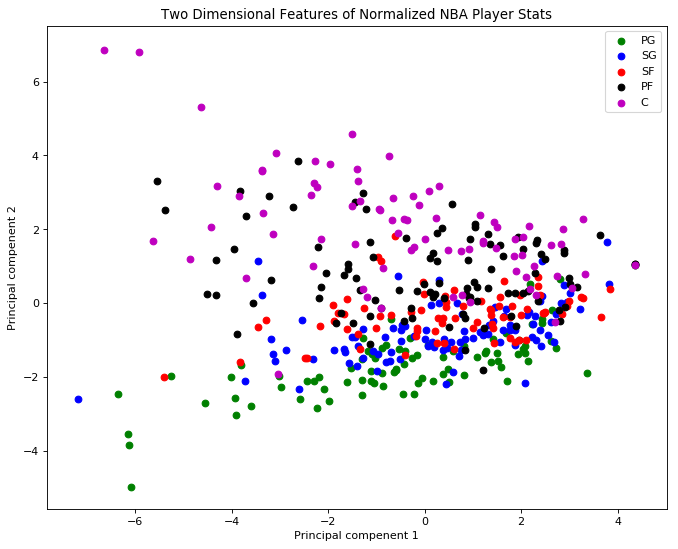

In [56]:
oneX1 = list(); oneY1 = list()
twoX1 = list(); twoY1 = list()
threeX1 = list(); threeY1 = list();
fourX1 = list(); fourY1 = list();
fiveX1 = list(); fiveY1 = list();

for i in range(len(trainDataSet)):
    if(labels[i] == 1):
        oneX1.append(Xhat.T[i][0])
        oneY1.append(Xhat.T[i][1])
    if(labels[i] == 2):
        twoX1.append(Xhat.T[i][0])
        twoY1.append(Xhat.T[i][1])
    if(labels[i] == 3):
        threeX1.append(Xhat.T[i][0])
        threeY1.append(Xhat.T[i][1])
    if(labels[i] == 4):
        fourX1.append(Xhat.T[i][0])
        fourY1.append(Xhat.T[i][1])
    if(labels[i] == 5):
        fiveX1.append(Xhat.T[i][0])
        fiveY1.append(Xhat.T[i][1])

plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
onePlot1 = plt.scatter(oneX1, oneY1, color='g', marker='o', label='PG')
twoPlot1 = plt.scatter(twoX1, twoY1, color='b', marker='o', label='SG')
threePlot1 = plt.scatter(threeX1, threeY1, color='r', marker='o', label='SF')
fourPlot1 = plt.scatter(fourX1, fourY1, color='k', marker='o', label='PF')
fivePlot1 = plt.scatter(fiveX1, fiveY1, color='m', marker='o', label='C')
plt.title('Two Dimensional Features of Normalized NBA Player Stats')
plt.xlabel('Principal compenent 1')
plt.ylabel('Principal compenent 2')
plt.legend(handles = [onePlot1, twoPlot1, threePlot1, fourPlot1, fivePlot1])
plt.show()

Data points towards the left (x < -3) are the players who play their true positions which is why they are clearly separable (Example player: Jerami Grant). Players to the right (-3 < x < 2) are your above average players who are more skilled than the latter. They perform more efficiently and contribute more than what they are expected to do (Example player: Mark Gasol). Players (x > 2) are the all-stars of the NBA, they are very versatile and their skill is above average across most statlines. A prime example of this is LeBron James, Kevin Durant and Stephen Curry. This explains why these data points are not clearly separable, they do not play like their true position which will alter their behavior in this study.

In [49]:
# Test data manipulation and PCA
tSet = testDataSet
testMean = np.mean(testDataSet.T,axis=1)
testMat = np.tile(testMean.reshape(11,1),(1,49))
testCent = testDataSet.T - testMat
print("Test data dimensions:",testCent.shape)

testNorm = np.zeros((11,49))
for i in range(len(testDataSet.T)):
    std = np.std(testCent[i])
    for j in range(len(testDataSet.T[0])):
        testNorm[i][j] = testCent[i][j] / std

# Projecting the principal components onto test data
testX = np.matmul(newPrinc.T, testNorm)
print("Dimensions of top values: ",newPrinc.shape)
print("Dimensions of projected data:",testX.shape)

Test data dimensions: (11, 49)
Dimensions of top values:  (11, 2)
Dimensions of projected data: (2, 49)


Prediction Labels:  49
Test Labels:  49
There are 31 correct predictions and 18 incorrect predicions.


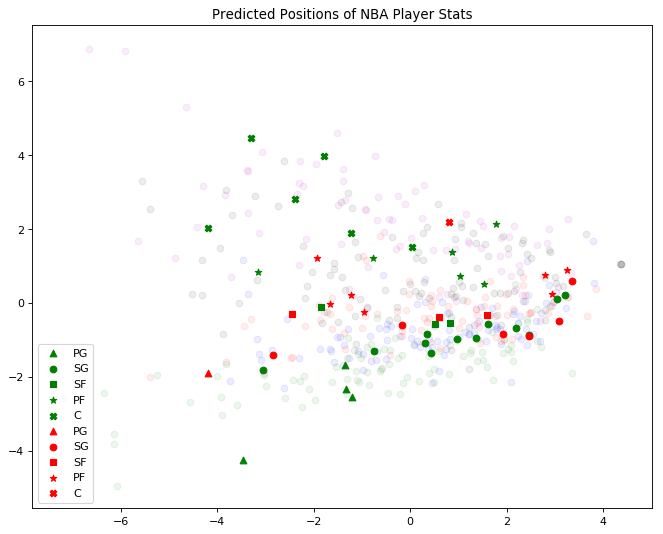

In [57]:
k = 15
labelList = []
predLabs = []

def calcDist(var1x, var1y, var2x, var2y):
    a = (var2y - var1y)**2
    b = (var2x - var1x)**2
    distance = math.sqrt(a+b)
    return distance

for x in range(len(testX.T)):
    distList = list()
    for i in range(len(Xhat.T)-1):
        for j in range(len(Xhat.T[0])-1):
            d = calcDist(testX.T[x][j],testX.T[x][j+1],Xhat.T[i][j],Xhat.T[i][j+1])
            distList.append(d)
            distList.append(trainLabels[i])
    dList = np.array(distList)
    vals = dList.reshape(440,2)
    sortedList = sorted(vals, key=lambda y:y[0])
    for a in range(k):
        labelList.append(sortedList[a][1])

predictions = np.array(labelList)
pred = predictions.reshape(49,k)

for j in range(len(pred)):
    counts = np.bincount(pred[j].astype(np.int))
    predLabs.append(np.argmax(counts))

print("Prediction Labels: ",len(predLabs))
print("Test Labels: ",len(testLabels))
correctList = 0
incorrectList = 0
incPos = list(); actualPos = list(); index = list()

corr1x = list(); corr1y = list()
corr2x = list(); corr2y = list()
corr3x = list(); corr3y = list()
corr4x = list(); corr4y = list()
corr5x = list(); corr5y = list()

inco1x = list(); inco1y = list()
inco2x = list(); inco2y = list()
inco3x = list(); inco3y = list()
inco4x = list(); inco4y = list()
inco5x = list(); inco5y = list()

for i in range(len(predLabs)):
    if(predLabs[i] == testLabels[i] and predLabs[i] == 1):
        corr1x.append(testX.T[i][0])
        corr1y.append(testX.T[i][1])
        correctList+=1
    if(predLabs[i] == testLabels[i] and predLabs[i] == 2):
        corr2x.append(testX.T[i][0])
        corr2y.append(testX.T[i][1])
        correctList+=1
    if(predLabs[i] == testLabels[i] and predLabs[i] == 3):
        corr3x.append(testX.T[i][0])
        corr3y.append(testX.T[i][1])
        correctList+=1
    if(predLabs[i] == testLabels[i] and predLabs[i] == 4):
        corr4x.append(testX.T[i][0])
        corr4y.append(testX.T[i][1])
        correctList+=1
    if(predLabs[i] == testLabels[i] and predLabs[i] == 5):
        corr5x.append(testX.T[i][0])
        corr5y.append(testX.T[i][1])
        correctList+=1
    if(predLabs[i] != testLabels[i] and predLabs[i] == 1):
        inco1x.append(testX.T[i][0])
        inco1y.append(testX.T[i][1])
        incorrectList+=1
        incPos.append(predLabs[i]); actualPos.append(testLabels[i]); index.append(i)
    if(predLabs[i] != testLabels[i] and predLabs[i] == 2):
        inco2x.append(testX.T[i][0])
        inco2y.append(testX.T[i][1]) 
        incorrectList+=1
        incPos.append(predLabs[i]); actualPos.append(testLabels[i]); index.append(i)
    if(predLabs[i] != testLabels[i] and predLabs[i] == 3):
        inco3x.append(testX.T[i][0])
        inco3y.append(testX.T[i][1])
        incorrectList+=1
        incPos.append(predLabs[i]); actualPos.append(testLabels[i]); index.append(i)
    if(predLabs[i] != testLabels[i] and predLabs[i] == 4):
        inco4x.append(testX.T[i][0])
        inco4y.append(testX.T[i][1])
        incorrectList+=1
        incPos.append(predLabs[i]); actualPos.append(testLabels[i]); index.append(i)
    if(predLabs[i] != testLabels[i] and predLabs[i] == 5):
        inco5x.append(testX.T[i][0])
        inco5y.append(testX.T[i][1])
        incorrectList+=1
        incPos.append(predLabs[i]); actualPos.append(testLabels[i]); index.append(i)
print("There are",correctList,"correct predictions and",incorrectList,"incorrect predicions.")
      
plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')

onePlot1 = plt.scatter(oneX1, oneY1, color='g', alpha = 0.07, marker='o', label='PG')
twoPlot1 = plt.scatter(twoX1, twoY1, color='b', alpha = 0.07, marker='o', label='SG')
threePlot1 = plt.scatter(threeX1, threeY1, color='r', alpha = 0.07, marker='o', label='SF')
fourPlot1 = plt.scatter(fourX1, fourY1, color='k', alpha = 0.07, marker='o', label='PF')
fivePlot1 = plt.scatter(fiveX1, fiveY1, color='m',alpha = 0.07,  marker='o', label='C')

testCo1 = plt.scatter(corr1x, corr1y, color='g', marker='^', label = 'PG')
testCo2 = plt.scatter(corr2x, corr2y, color='g', marker='o', label = 'SG')
testCo3 = plt.scatter(corr3x, corr3y, color='g', marker='s', label = 'SF')
testCo4 = plt.scatter(corr4x, corr4y, color='g', marker='*', label = 'PF')
testCo5 = plt.scatter(corr5x, corr5y, color='g', marker='X', label = 'C')

testIn1 = plt.scatter(inco1x, inco1y, color='r', marker='^', label = 'PG')
testIn2 = plt.scatter(inco2x, inco2y, color='r', marker='o', label = 'SG')
testIn3 = plt.scatter(inco3x, inco3y, color='r', marker='s', label = 'SF')
testIn4 = plt.scatter(inco4x, inco4y, color='r', marker='*', label = 'PF')
testIn5 = plt.scatter(inco5x, inco5y, color='r', marker='X', label = 'C')

plt.title('Predicted Positions of NBA Player Stats')
plt.legend(handles = [testCo1, testCo2, testCo3, testCo4, testCo5, testIn1, testIn2, testIn3, testIn4, testIn5], loc='lower left')
plt.show()
      

In [51]:
print("Incorrectly Predicted Positions:\n")
for i in range(len(incPos)):
    print("Predicted:",incPos[i]," Correct Position:",actualPos[i], " Player:",testNames[index[i]])
    

Incorrectly Predicted Positions:

Predicted: 2  Correct Position: 3  Player: Terrence Ross
Predicted: 3  Correct Position: 4  Player: Thaddeus Young
Predicted: 5  Correct Position: 3  Player: Thomas Robinson
Predicted: 2  Correct Position: 1  Player: Tim Frazier
Predicted: 4  Correct Position: 2  Player: Tony Allen
Predicted: 4  Correct Position: 2  Player: Toure' Murry
Predicted: 3  Correct Position: 4  Player: Travis Wear
Predicted: 2  Correct Position: 3  Player: Trevor Ariza
Predicted: 2  Correct Position: 1  Player: Tyler Ennis
Predicted: 1  Correct Position: 2  Player: Tyreke Evans
Predicted: 4  Correct Position: 3  Player: Victor Claver
Predicted: 4  Correct Position: 3  Player: Wesley Johnson
Predicted: 3  Correct Position: 2  Player: Will Barton
Predicted: 2  Correct Position: 1  Player: Will Cherry
Predicted: 4  Correct Position: 3  Player: Wilson Chandler
Predicted: 2  Correct Position: 3  Player: Xavier Henry
Predicted: 4  Correct Position: 5  Player: Zaza Pachulia
Predicte

We see that there are 18 incorrectly predicted player positions. However, before we jump to conclusions, let us thoroughly analyze this. The first player, Terrence Ross is an interchangeable player, his primary position is the 3 (shooting guard), but he is sometimes assigned as the shooting guard because he can score like one and simply because of his teammate (Demar Derozan), who is already a shooting guard on the court. This is common for players to play the position that is closest to theirs, for example, some shooting guards will play small forward (2 <-> 3) and vice versa, while some power forwards will play center (4 <-> 5) and vice versa. This happens because of other players that come on the lineup with them or simply because they have the talent to play another position. We can apply this phenomenon to Terrance Ross, Thaddeus Young, Travis Wear, Tim Frazier, Tyreke Evans, Trevor Ariza, Tyler Ennis, Will Barton, Wilson Chandler, Xavier Henry and Zaza Pachulia. 

Now we see that there are 7 inccorrectly predicted players. A prime example is Zoran Dragic, who is mainly a point/shooting guard (1/2) who primarily scores and sets up plays for his teammates. Given his height (6'4") there is no way he would be a power forward which was his predicted position. 

So we can see that enen though this algorithm predicted 31/49 correctly, in reality it actually got 42/49 (85.7%) correct. 

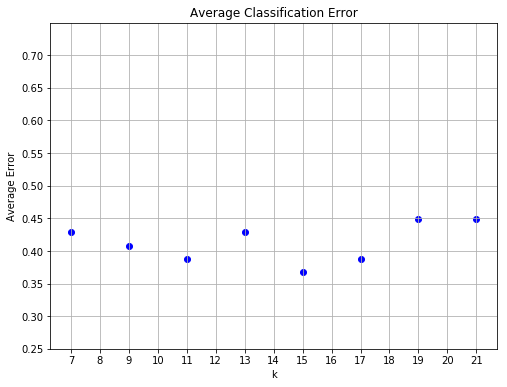

The smallest error found was using k= 15 at an error of 0.3673469387755102


In [52]:
kvals = [7, 9, 11, 13, 15, 17, 19, 21]

def calcDist(var1x, var1y, var2x, var2y):
    a = (var2y - var1y)**2
    b = (var2x - var1x)**2
    distance = math.sqrt(a+b)
    return distance

def findNearestN(k, splitR):
    labList = []
    pLabs = []
    for x in range(len(testX.T)):
        distList = list()
        for i in range(len(Xhat.T)-1):
            for j in range(len(Xhat.T[0])-1):
                d = calcDist(testX.T[x][j],testX.T[x][j+1],Xhat.T[i][j],Xhat.T[i][j+1])
                distList.append(d)
                distList.append(trainLabels[i])
        dList = np.array(distList)
        vals = dList.reshape((int)(490*splitR)-1,2)
        sortedList = sorted(vals, key=lambda y:y[0])
        for a in range(k):
            labList.append(sortedList[a][1])
            
    predictions = np.array(labList)
    pred = predictions.reshape(49,k)

    for j in range(len(pred)):
        counts = np.bincount(pred[j].astype(np.int))
        pLabs.append(np.argmax(counts))

    return pLabs

def checkLabels(predictedL, label):
    correctX = list(); incorrectX = list()
    correctY = list(); incorrectY = list()
    numCorr = 0; numInco = 0
    
    for i in range(len(predictedL)):
        if(predictedL[i] == testLabels[i] and predictedL[i] == label):
            correctX.append(testX.T[i][0])
            correctY.append(testX.T[i][1])
            numCorr += 1
        if(predictedL[i] != testLabels[i] and predictedL[i] == label):
            incorrectX.append(testX.T[i][0])
            incorrectY.append(testX.T[i][1])
            numInco += 1
    return correctX, correctY, incorrectX, incorrectY, numCorr, numInco

def KNNErr(k):
    tempN = findNearestN(k, splitR)
    cx1, cy1, ix1, iy1, c1, i1 = checkLabels(tempN, 1)
    cx2, cy2, ix2, iy2, c2, i2 = checkLabels(tempN, 2)
    cx3, cy3, ix3, iy3, c3, i3 = checkLabels(tempN, 3)
    cx4, cy4, ix4, iy4, c4, i4 = checkLabels(tempN, 4)
    cx5, cy5, ix5, iy5, c5, i5 = checkLabels(tempN, 5)
    avgClassError = (i1+i2+i3+i4+i5) / len(testX.T)
    return avgClassError

e7 = KNNErr(7)
e9 = KNNErr(9)
e11 = KNNErr(11)
e13 = KNNErr(13)
e15 = KNNErr(15)
e17 = KNNErr(17)
e19 = KNNErr(19)
e21 = KNNErr(21)
avgError = [ e7, e9, e11, e13, e15, e17, e19, e21]    
            
fig = plt.figure(figsize=(8,6))
plt.scatter(kvals, avgError, color='b')
plt.title('Average Classification Error')
plt.xlabel('k')
plt.xticks(np.arange(7, 22, 1))
plt.yticks(np.arange(0.25,0.75, 0.05))
plt.ylabel('Average Error')
plt.ylim(0.25,0.75)
plt.grid()
plt.show()
print('The smallest error found was using k=',k,'at an error of',np.min(avgError))

In [53]:
# 5-fold Cross Validation
fold1 = dataSet[0:98,:];    lfold1 = labels[0:98]
fold2 = dataSet[98:196,:];  lfold2 = labels[98:196]
fold3 = dataSet[196:294,:]; lfold3 = labels[196:294]
fold4 = dataSet[294:392,:]; lfold4 = labels[294:392]
fold5 = dataSet[392:,:];    lfold5 = labels[392:]

def ridgeRegression(x_hat, y_hat, Lambda):
    XTXilamda = np.linalg.inv((x_hat.T@x_hat) + Lambda*np.identity(11))
    XT_y = x_hat.T@y_hat
    w_hat = XTXilamda@XT_y
    return w_hat  

def ridgeRegCR(train1, train2, train3, valid, test, trainLab1, trainLab2, trainLab3, vLab, tLab):
    bestErrors = []
    arbErr = np.inf
    bestLambda = 0
    for lam in (np.arange(0,1,0.002)):
        errArr = []
        finalErrors = []
        trainSet = np.concatenate((train1,train2,train3))
        trainLabs = np.concatenate((trainLab1, trainLab2, trainLab3))
        
        # Cross Validation on Training and Validation Sets
        ridge = ridgeRegression(trainSet, trainLabs, lam)
        prediction = valid@ridge
        testLabs = np.reshape(vLab,(prediction.shape[0],1))
        errArr.append((np.linalg.norm((prediction - testLabs),2))**2 / prediction.shape[0])
        
        # Test on test set
        newTrain = np.concatenate((valid, trainSet))
        newLabs = np.concatenate((vLab, trainLabs))
        w = ridgeRegression(newTrain, newLabs, lam)
        pred = test@w
        testLabels = np.reshape(tLab,(pred.shape[0],1))
        finalErrors.append((np.linalg.norm((pred - testLabels),2))**2 / pred.shape[0])
    
    # Check for updated errors
    if(np.mean(errArr) < arbErr):
        arbErr = np.mean(errArr)
        bestLamda = lam
        bestErrors = finalErrors
    
    return bestLamda, bestErrors
        
bestL1, bestErrArr1 = ridgeRegCR(fold1,fold2,fold3,fold4,fold5,lfold1,lfold2,lfold3,lfold4,lfold5)
bestL2, bestErrArr2 = ridgeRegCR(fold2,fold3,fold4,fold5,fold1,lfold2,lfold3,lfold4,lfold5,lfold1)
bestL3, bestErrArr3 = ridgeRegCR(fold3,fold4,fold5,fold1,fold2,lfold3,lfold4,lfold5,lfold1,lfold2)
bestL4, bestErrArr4 = ridgeRegCR(fold4,fold5,fold1,fold2,fold3,lfold4,lfold5,lfold1,lfold2,lfold3)
bestL5, bestErrArr5 = ridgeRegCR(fold5,fold1,fold2,fold3,fold4,lfold5,lfold1,lfold2,lfold3,lfold4)

bestLarr = [bestL1, bestL2, bestL3, bestL4, bestL5]
bestErr = [bestErrArr1, bestErrArr2, bestErrArr3, bestErrArr4, bestErrArr5]

print("Average prediction error:",(np.mean(bestErr))/dataSet.shape[0])

Average prediction error: 0.3934598470484746


We see that the 5-Fold Cross Validation error is 0.393, which is very close to the kNN Classification algorithm error of 0.367. 